# From vectors to Hilbert spaces

## Table of Contents <a name="toc"></a>

0. [Table of Contents](#toc)
1. [Introduction](#introduction)
2. [Vector spaces, inner products, and norms](#vectors-norms)
    1. [Vectors and vector spaces](#vectors)
    2. [Inner product](#inner-product)
    3. [Norms](#norms)
    4. [Metrics](#metrics)
3. [Function spaces](#function-spaces)
    1. [Convergence and completeness](#completeness)
    2. [Banach and Hilbert spaces](#banach-hilbert)
4. [Example function spaces](#ex-spaces)
    1. [Hilbert spaces](#ex-hilbert)
    2. [Banach spaces](#ex-banach)
    3. [Inner product spaces](#ex-inner)
    4. [Normed vector spaces](#ex-normed)
5. [Conclusion](#conclusion)
6. [References](#references)

## Introduction <a name="introduction"></a>

Reading research papers in the areas of signal processing and machine learning can be daunting to the new practitioner; there are many curly letters, vertical lines, "such that's", and much more than can seem intentionally obfuscated to those not fluent in the language of applied mathematics. Additionally, one may wonder the origin of many algorithms: What makes the Fourier transform and wavelets so special? How do support vector machines map data to an infinite-dimensional space? Why do eigen-whatevers show up everywhere? This series of articles aims to tackle these questions and more.

These articles are aimed at the engineer or computer scientist who wishes to gain a deeper understanding of signal processing and machine learning (as well as many other fields such as controls, communications, graphics, and others) and be able to read what may initially look like archaic expressions. It is assumed that the reader is familiar with basic calculus, statistics, and linear algebra (many of these topics will be reviewed as needed). The mathematicians reading may be unsatisfied with the lack of rigor new topics will be tackled with, as the main aim will be to present them in a digestible fashion to engineers and computer scientists. Though we will discuss theorems and concepts from fields such as topology, functional analysis, optimization, numerical methods, and more, we will forgo the more tedious or convoluted proofs in favor of presenting the applications of their results.

We will first start off in the land of linear algebra, for it is here where "data" takes form. We will review basic concepts one may or may not remember from their first few weeks in a linear algebra course, before tackling more complicated topics such as Banach and Hilbert spaces. Though Hilbert spaces may at first conjure up images of quantum physics and infinities, the basic definition turns out to be quite simple, and lays the foundation for many concepts to come. We will primarily reference Vetterli et al's *Foundations of Signal Processing* [[1]](#ref1) and Moon et al's *Mathematical Methods and Algorithms for Signal Processing* [[2]](#ref2).

We will use some standard python libraries to show how the mathematics discussed in this article can be applied with code.

```python
import matplotlib.pyplot as plt
import numpy as np
```

## Vector spaces, inner products, and norms <a name="vectors-norms"></a>

Before we get into the math, it may do some good to remind the reader why we care about vectors and all this math. No matter if our data is in the form of a radar signal or information about a financial asset, it will always be in the form of a **vector** or **matrix**. Therefor, building a solid foundation for the math used to manipulate vectors is essential.

### Vectors and vector spaces <a name="vectors"></a>

We start by defining two vectors $\mathbf{a} = [a_0 \; a_1]^T$ and $\mathbf{b} = [b_0 \; b_1]^T$. From here on out, vectors will be denoted by lowercase bolded letters ($\mathbf{a}$) and matrices denoted by uppercase non-bolded letters ($A$). We will say the vectors $\mathbf{a}$ and $\mathbf{b}$ lie in the field of 2-dimensional scalars of real-values, denoted as $\mathbf{a}, \mathbf{b} \in \mathbb{R}^2$. If we create a new vector $\mathbf{c}$ from the addition of $\mathbf{a}$ and $\mathbf{b}$ such that $\mathbf{c} = [a_0 + b_0 \; a_1 + b_1]^T$ that also lies within $\mathbb{R}^2$, then we can say these vectors lie within a **vector space**. [[1]](#ref1)

> **VECTOR SPACE**
>
> A vector space over a field of scalars $\mathbb{C}$ (or $\mathbb{R}$) is a set of vectors, $V$ , together with operations of vector addition and scalar multiplication. For any $\mathbf{x}$, $\mathbf{y}$, $\mathbf{z}$ in $V$ and α, β in $\mathbb{C}$ (or $\mathbb{R}$), these operations must satisfy the following properties:
>
>1.  Commutativity: $\mathbf{x} + \mathbf{y} = \mathbf{y} + \mathbf{x}$
2. Associativity: $(\mathbf{x} + \mathbf{y}) + \mathbf{z} = \mathbf{x} + (\mathbf{y} + \mathbf{z})$ and $(αβ)\mathbf{x} = α(β\mathbf{x})$
3. Distributivity: $α(\mathbf{x} + \mathbf{y}) = α \mathbf{x} + α \mathbf{y}$ and $(α + β) \mathbf{x} = α \mathbf{x} + β \mathbf{x}$
4. Additive identity: There exists an element $\mathbf{0}$ in $\mathcal{V}$ such that $\mathbf{x} + \mathbf{0} = \mathbf{0} + \mathbf{x} = \mathbf{x}$ for every $\mathbf{x}$ in $V$
5. Additive inverse: For each $\mathbf{x}$ in $V$ , there exists a unique element $−\mathbf{x}$ in $\mathcal{V}$ such that $\mathbf{x} + (−\mathbf{x}) = (−\mathbf{x}) + \mathbf{x} = \mathbf{0}$
6. Multiplicative identity: For every $\mathbf{x}$ in $V$ , $1 · \mathbf{x} = \mathbf{x}$.

One example we will see is the vector space of complex-valued finite-dimensional vectors $\mathbb{C}^N$, which is defined as $\mathbb{C}^N = \bigl\{ \mathbf{x} = [x_0 \; x_1 \; ... \; x_{N-1} ]^T \;\vert\; x_n \in \mathbb{C}, n \in \{ 0, 1, ..., N-1 \} \bigr\}$. This basically says that $\mathbb{C}^N$ is defined as the set ($\{ \}$) of N-dimensional vectors ($\mathbf{x} = [x_0 \; x_1 \; ... \; x_{N-1} ]^T$) such that ($\;\vert\;$) every element of the vector is a complex-valued scalar ($x_n \in \mathbb{C}$) with $n$ being the set of integers from $0$ to $N-1$ ($n \in \{ 0, 1, ..., N-1 \}$). You may begin to see why we prefer to use mathematical notation, as it is much less verbose! Note that the vector space of real-valued finite-dimensional vectors $\mathbb{R}^N$ is basically the same. [[1]](#ref1)

Some other terms to familiarize yourself with: the vector space $\mathbb{C}^N$ is an example of a **sequence**, where there are discrete sets of values. A vector space with a continuous set of values is called a **function**. One such example is  the complex-valued functions over $\mathbb{R}$, $\mathbb{C}^\mathbb{R}$, which is defined as $\mathbb{C}^\mathbb{R} = \bigl\{ x \;\vert\; x(t) \in \mathbb{C}, t \in \mathbb{R} \bigr\}$. Again, this is read as the vector space $\mathbb{C}^\mathbb{R}$ is the set ($\{ \}$) of functions ($x$) such that ($\;\vert\;$) every element of the vector is complex-valued ($x(t) \in \mathbb{C}$) and $t$ is a member of the real-valued scalars ($t \in \mathbb{R}$). [[1]](#ref1)

A couple of other useful definitons relavant to vector spaces:

> **SUBSPACE**
>
> A nonempty subset $S$ of a vector space $V$ is a subspace when it is closed (to be defined later...) under the operations of vector addition and scalar multiplication:
>
>1. For all $\mathbf{x}$ and $\mathbf{y}$ in $S$, $\mathbf{x} + \mathbf{y}$ is in $S$
2. For all $\mathbf{x}$ in $S$ and $α$ in $\mathbb{C}$ (or $\mathbb{R}$), $α \mathbf{x}$ is in $S$

> **SPAN**
>
> The span of a set of vectors $S$ is the set of all finite linear combinations of vectors in $S$:
>
> $\text{span}(S) = \bigl\{ \sum_{k=0}^{N-1} \alpha_k \varphi_k \;\vert\; \alpha_k \in \mathbb{C} \; \text{or} \; \mathbb{R}, \varphi_k \in S \bigr\}$


> **LINEAR INDEPENDENCE**
>
> The set of vectors $\bigl\{ \varphi_0, \varphi_1, ..., \varphi_{N-1} \bigr\}$ is called linearly independent when $\sum_{k=0}^{N-1} \alpha_k \varphi_k = \mathbf{0}$ is true only if $\alpha_k = 0$ for all $k$. Otherwise, the set is linearly dependent. An infinite set of vectors is called linearly independent when every finite subset is linearly independent.

The below code shows how we can define vectors using numpy, as well as give a visual for what addition in a vector space looks like. Here, we work in the vector space $\mathbb{R}^2$ for ease of visualization, but numpy supports any arbitrary dimensioned vector space.

```python
# define vectors
a = np.array([1, 2])
b = np.array([-0.5, -3.8])
c = a + b

# define origin for plot
origin = np.array([0, 0])

# display results
plt.quiver(origin[0], origin[1], a[0], a[1], color='b', angles='xy', scale_units='xy', scale=1, label='a')
plt.quiver(a[0], a[1], b[0], b[1], color='g', angles='xy', scale_units='xy', scale=1, label='b')
plt.quiver(origin[0], origin[1], c[0], c[1], color='r', angles='xy', scale_units='xy', scale=1, label='c')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Vectors')
plt.legend()
plt.axis([-1, 2, -3, 3])
plt.show()
```

![vector-plot](/../assets/img/math/vector-plot.png?raw=true)

*Figure 1: 2D vectors and their addition*

### Inner product <a name="inner-product"></a>

We will next want to define a notion of similarity between our two vectors $\mathbf{a} = [a_0 \; a_1]^T$ and $\mathbf{b} = [b_0 \; b_1]^T$. We will define a function called the **inner product** $\alpha = \langle \mathbf{a}, \mathbf{b} \rangle$ to measure their similarity such that $\alpha = a_0 b_0 + a_1 b_1$. More precisely, inner products give a notion of geometry, length, and direction for any arbitrary vector space. The astute among you may notice that this is simply the **dot product** $\alpha = \mathbf{b}^T \mathbf{a}$, and this is indeed known as the **standard inner product** on $\mathbb{R}^N$, or the **Euclidean inner product**, but there exists other definitions of an inner product. [[2]](#ref2)

> **INNER PRODUCT**
>
> An inner product on a vector space $V$ over $\mathbb{C}$ (or $\mathbb{R}$) is a complex-valued (or real-valued) function $\langle \cdot, \cdot \rangle$ defined on $V \times V$, with the following properties for any $\mathbf{x}, \mathbf{y}, \mathbf{z} ∈ V$ and $α ∈ \mathbb{C}$ (or $\mathbb{R}$):
>
>1. Distributivity: $\langle \mathbf{x} + \mathbf{y}, \mathbf{z} \rangle = \langle \mathbf{x}, \mathbf{z} \rangle + \langle \mathbf{y}, \mathbf{z} \rangle$
2. Linearity in the first argument: $\langle \alpha \mathbf{x}, \mathbf{y} \rangle = \alpha \langle \mathbf{x}, \mathbf{y} \rangle$
3. Hermitian symmetry: $\langle \mathbf{x}, \mathbf{y} \rangle^* = \langle \mathbf{y}, \mathbf{x} \rangle$
4. Positive definiteness: $\langle \mathbf{x}, \mathbf{x} \rangle \geq 0$, and $\langle \mathbf{x}, \mathbf{x} \rangle = 0$ if and only if $\mathbf{x} = \mathbf{0}$

Inner products can be defined for both sequences and functions. Take for example the standard inner product defined for the vector space $\mathbb{C}^\mathbb{R}$: $\langle x, y \rangle = \int_{-\infty}^{\infty} x(t) y^*(t) \,dt$. Of course, for this inner product to exist, the expression must result in a finite value, and so care must be taken to choose a subspace of continuous functions on $\mathbb{C}^\mathbb{R}$ to evaluate. There are also **weighted inner products** defined on $\mathbb{C}^N$ created by inserting a weighted Hermitian matrix between elements such that $\langle \mathbf{x}, \mathbf{y} \rangle_W = \mathbf{y}^T W \mathbf{x}$, where $W \in \mathbb{C}^{N \times N}$ is **positive definite**, meaning it satisfies the inequality $\mathbf{x}^T W \mathbf{x} > 0$ for all $\mathbf{x} \neq \mathbf{0}$ (here, the bold 0 represents the vector of zeros). A vector space with an inner product defined for it is an **inner product space**, or **pre-Hilbert space**. [[1]](#ref1) [[2]](#ref2)

Below is some python code to show different ways to implement the Euclidean norm, and shows how they are equivalent. Additionally, the inner product's connection to the norm (which we will cover next) is demonstrated.

```python
# compute inner product
inner_prod = np.inner(a, b)
dot_prod1 = np.dot(a, b)
dot_prod2 = a @ b

# compute norm
norm_from_ip = np.sqrt(np.inner(a, a))
norm = np.linalg.norm(a, 2)

# display results
print('<a,b> =', inner_prod)
print('a*b =', dot_prod1)
print('a@b =', dot_prod2)
print('sqrt(<a,a>) =', norm_from_ip)
print('||a|| =', norm)
```

![inner-products](/../assets/img/math/inner-products.png?raw=true)

*Figure 2: Output showing the equivalence of different python functions to compute the Euclidean inner product and their induced norm*

### Norms <a name="norms"></a>

Now one may ask what we get when we take the inner product of a vector $\mathbf{x}$ with itself. This is known as a norm **induced** by an inner product such that $\vert\vert \mathbf{x} \vert\vert = \sqrt{\langle \mathbf{x}, \mathbf{x} \rangle}$, and is a measure of the length of the vector. For a vector $\mathbf{x} = [x_0 \; x_1]^T$ and Euclidean inner product, its induced norm is thus defined as $\vert\vert \mathbf{x} \vert\vert = \sqrt{x_0^2 + x_1^2}$. Seem familiar? [[1]](#ref1)

> **NORM**
>
> A norm on a vector space $\mathcal{V}$ over $\mathbb{C}$ (or $\mathbb{R}$) is a real-valued function $\vert\vert \cdot \vert\vert$ defined on $\mathcal{V}$, with the following properties for any $\mathbf{x}, \mathbf{y} ∈ V$ and $α ∈ \mathbb{C}$ (or $\mathbb{R}$):
>
>1. Positive definiteness: $\vert\vert \mathbf{x} \vert\vert \geq 0$, and $\vert\vert \mathbf{x} \vert\vert = 0$ if and only if $\mathbf{x} = \mathbf{0}$
2. Positive scalability: $\vert\vert \alpha \mathbf{x} \vert\vert = \vert \alpha \vert \vert\vert \mathbf{x} \vert\vert$
3. Triangle inequality: $\vert\vert \mathbf{x} + \mathbf{y} \vert\vert \leq \vert\vert \mathbf{x} \vert\vert + \vert\vert \mathbf{y} \vert\vert$, with equality if and only if $\mathbf{y} = \alpha \mathbf{x}$

Norms get their name from the fact that they can be used to **normalize** a vector and turn it into a **unit vector** of length 1. This is done by simple dividing the vector by its norm: $\mathbf{\hat{x}} = \dfrac{\mathbf{x}}{\vert\vert \mathbf{x} \vert\vert}$. [[2]](#ref2)

A famous result of the above is the **Cauchy-Schwarz Inequality**: $\vert \langle \mathbf{x}, \mathbf{y} \rangle \vert \leq \vert\vert \mathbf{x} \vert\vert \cdot \vert\vert \mathbf{y} \vert\vert$ with equality if and only if $\mathbf{y} = \alpha \mathbf{x}$ for some scalar $\alpha$. This also leads to the result of the angle between two vectors being given as such: $\cos(\theta) = \dfrac{\langle \mathbf{x}, \mathbf{y} \rangle}{\vert\vert \mathbf{x} \vert\vert \cdot \vert\vert \mathbf{y} \vert\vert}$. [[1]](#ref1)

In more general terms, the **Euclidean norm** on $\mathbb{C}^N$, otherwise know as the $\mathcal{l}_2$ norm, is given as $\vert\vert \mathbf{x} \vert\vert_2 = (\sum_{n=0}^{N-1} \vert x_n \vert^2)^{1/2}$. For norms not induced by an inner product, there is also the **Manhatten norm** on $\mathbb{C}^N$, otherwise know as the $\mathcal{l}_1$ norm, given as $\vert\vert \mathbf{x} \vert\vert_1 = \sum_{n=0}^{N-1} \vert x_n \vert$. The $\mathcal{l}_{\infty}$ norm defined on $\mathbb{C}^N$ is defined as $\vert\vert \mathbf{x} \vert\vert_{\infty} = \text{max}_{n=0, 1, ..., N-1} \vert x_n \vert$, or the element of largest absalute value. These norms are further generalized to the notion of the $\mathcal{l}_{p}$ norm given as $\vert\vert \mathbf{x} \vert\vert_p = (\sum_{n=0}^{N-1} \vert x_n \vert^p)^{1/p}$ where $p$ is a real-valued scalar greater than or equal to 1. If the $\mathcal{l}_{p}$ norm is not given (such as $\vert\vert \cdot \vert\vert$), it can be assumed that it is refering to the $\mathcal{l}_{2}$ norm. [[2]](#ref2)

Since all inner product spaces induce a norm, it follows that every inner product space is also a **normed vector space**. As it was mentioned that norms do not need to be defined by an inner product, it also follows that a normed vector space need not also be an inner product space. [[1]](#ref1) [[2]](#ref2)

Plotted below are several *unit balls* for different $\mathcal{l}_{p}$ norms. These basically solve $(x_1^p + x_2^p)^{1/p} = 1$ for $x_1 \in [-1, 1]$. Readers will be familiar for the case $p=2$ as it is the unit circle. As $p$ approaches infinity, the unit ball becomes more and more square-like.

```python
# define domain
n = np.linspace(0, 2 * np.pi, 1000)
x1 = np.cos(n)
x2 = np.sin(n)
x = np.array([x1, x2])

# construct unit balls
p_arr = [1, 1.5, 2, 3]
unit_balls = []
for p in p_arr :
    norm = np.sum(np.abs(x) ** p, axis=0) ** (1/p)
    unit_balls.append(x / norm)

# plot unit balls
plt.figure(figsize=(6, 6), dpi=80)
i = 0
for ball in unit_balls :
    plt.plot(ball[0], ball[1], label='{}-norm'.format(p_arr[i]))
    i += 1
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('$p$-norm unit balls')
plt.legend()
plt.show()
```

![unit-balls](/../assets/img/math/unit-balls.png?raw=true)

*Figure 3: Plot of unit balls for p=1, 1.5, 2, and 3*

### Metrics <a name="metrics"></a>

This notion of length of a vector can be extended to the length of one vector minus another, or the **distance** between these vectors.

> **METRIC**, or **DISTANCE**
>
> In a normed vector space, the metric, or distance, between vectors $\mathbf{x}$ and $\mathbf{y}$ is the norm of their difference: $\text{d}(\mathbf{x}, \mathbf{y}) = \vert\vert \mathbf{x} - \mathbf{y} \vert\vert$

Much like norms induced by an inner product space is only a fraction of the possible norms, metrics induced by a normed vector space are only one of many different distance metrics. A **metric space** is simply a set combined with a metric. [[1]](#ref1) [[2]](#ref2) 

## Function spaces <a name="function-spaces"></a>

From these definitions of vectors, inner products, norms, and metrics comes a very valuable tool known as **function spaces**. These are typically covered in depth in the study of functional analysis, but we will simply relay their basic definitions and properties here. We will find that they are invaluable for the foundations of nearly all maths discussed from here on out.

### Convergence and completeness <a name="fcompleteness"></a>

Before getting to Banach and Hilbert spaces, we have to define some important terms from topology, namely **Cauchy sequences** and **Completeness**. In general, we will work in the vector spaces of $\mathbb{R}^N$ and $\mathbb{C}^N$ for some arbitrary dimension $N \in \mathbb{N}$, which as we will later see always satisfies these two conditions. Nonetheless, it is important to define these so as to differentiate Banach spaces from normed vector spaces, and Hilbert spaces from inner product spaces.

> **CAUCHY SEQUENCE OF VECTORS**
>
> A sequence of vectors $\mathbf{x}_0, \mathbf{x}_1, ...$ in a normed vector space is called a Cauchy sequence when, given any $ε > 0$, there exists a $K_ε$ such that: $\text{d}(\mathbf{x}_n - \mathbf{x}_m) < ε$ for all $n, m > K_ε$

Cauchy sequences are a formalization of the concept of convergence. One counter example--that is, a sequence that convergences to a value not within its space--is the sequence $x_k = \sum_{n=0}^\infty \dfrac{1}{n!}$. This sequence consists of values in the set of rational numbers $\mathbb{Q}$, but converges to the irrational number $e$. Thus, this sequence is not **complete**. We can make it complete, however, by instead defining this sequence in the set of real numbers $\mathbb{R}$, of which both the irrational $e$ and the rational values $1 / n!$ are members of. [[1]](#ref1)

> **COMPLETENESS**
>
> A normed vector space $\mathcal{V}$ is said to be complete when every Cauchy sequence in $\mathcal{V}$ converges to a vector in $\mathcal{V}$

### Banach and Hilbert spaces <a name="banach-hilbert"></a>

With the above definitions out of the way, defining Banach and Hilbert spaces is trivial.

> **BANACH SPACES**
>
> A complete normed vector space is called a Banach space.

> **HILBERT SPACES**
>
> A complete inner product space is called a Hilbert space.

Easy! All of the properties of normed vector spaces and inner product spaces defined above can be applied. That is, Banach and Hilbert spaces are subsets of normed vector and inner product spaces, respectively. Additionally, Hilbert spaces are a subset of Banach spaces. The [following section](#ex-spaces) will have a venn diagram explaining these relationships, as well as go over the most common examples from each.

More often than not, our machine learning and signal processing models as well as their data will be working in a Hilbert space. Some of the most common examples will be $\mathbb{R}^N$ and $\mathbb{C}^N$ for any natural number $N$ (we will commonly use both interchangeably, as $\mathbb{R}$ is a subset of $\mathbb{C}$). In these finite dimensional vector spaces, any $\mathcal{l}_{p}$ norm satisfies the conditions to be a Banach space. However, only in the case where $p=2$ does the norm induce an inner product, resulting in the fact that a finite dimensional vector space equipped with a $\mathcal{l}_{2}$ norm results in a Hilbert space. [[1]](#ref1)

Another commonly seen example of a Hilbert space is the set of functions whose squares are finite-valued, denoted as $\mathcal{L}^{2}(\mathbb{R})$. To be more precise, it is the set of functions $f(x)$ with domain over the reals that satisfies the inequality $\int_{-\infty}^{\infty} \vert f(x) \vert^2 dx < \infty$. There is likewise a discrete-time valued version, the Hilbert space $\mathcal{l}^{2}(\mathbb{Z})$, which consists of the set of sequences $x_i$ over the domain of integers that satisfies the inequlity $ \sum_{i=1}^{\infty} \vert x_i \vert^2 < \infty$. While the former is useful for analytical solutions, the latter is what is used to implement algorithms on our digital computers. [[1]](#ref1)

## Example function spaces <a name="ex-spaces"></a>

![function-spaces](/../assets/img/math/function-spaces.png?raw=true)

### Hilbert spaces <a name="ex-hilbert"></a>

| Space | Explanation |
| :---- | :---------- |
| $\mathbb{R}^N$ | Set of finite and real-valued vectors with Euclidean inner product and induced norm |
| $\mathbb{C}^N$ | Set of finite and complex-valued vectors with Euclidean inner product and induced norm  |
| $\mathcal{l}^2(\mathbb{Z})$ | Set of infinite sequences $(x_1, x_2, ...)$ of real or complex values such that $ \sum_{i=1}^{\infty} \vert x_i \vert^2 < \infty$ |
| $\mathcal{L}^2(\mathbb{R})$ | Set of real-valued functions $f(\cdot)$ such that $\int_{-\infty}^{\infty} \vert f(x) \vert^2 dx < \infty$ |
| $\mathcal{L}^2(\mathbb{C})$ | Set of complex-valued functions $f(\cdot)$ such that $\int_{-\infty}^{\infty} \vert f(x) \vert^2 dx < \infty$ |

### Banach spaces <a name="ex-banach"></a>

| Space | Explanation |
| :---- | :---------- |
| $\mathcal{l}^1(\mathbb{Z})$ | Set of infinite sequences $(x_1, x_2, ...)$ of real or complex values such that $ \sum_{i=1}^{\infty} \vert x_i \vert < \infty$ |
| $\mathcal{L}^1(\mathbb{R})$ | Set of real-valued functions $f(\cdot)$ such that $\int_{-\infty}^{\infty} \vert f(x) \vert dx < \infty$ |
| $\mathcal{l}^{\infty}(\mathbb{Z})$ |  Set of infinite sequences $(x_1, x_2, ...)$ of real or complex values such that $ \text{max}_x( \vert x_i \vert) < \infty$ |
| $\mathcal{L}^{\infty}(\mathbb{R})$ | Set of real-valued functions $f(\cdot)$ such that $\text{max}_x(\vert f(x) \vert) < \infty$ |
| $\mathcal{l}^p(\mathbb{Z})$ |  Set of infinite sequences $(x_1, x_2, ...)$ of real or complex values such that $ \sum_{i=1}^{\infty} \vert x_i \vert^p < \infty$ |
| $\mathcal{L}^p(\mathbb{R})$ | Set of real-valued functions $f(\cdot)$ such that $\int_{-\infty}^{\infty} \vert f(x) \vert^p dx < \infty$ |

**Note:** Above not Hilbert spaces as not equipped with inner product (that is, norm not induced by an inner product).

### Inner product spaces <a name="ex-inner"></a>

| Space | Explanation |
| :---- | :---------- |
| $\mathcal{Q}^N$ | Sequences of rational vectors may converge to irrational vectors, thus is not complete |
| $C(\left[a, b \right])$ | The set of continuous functions in a given interval $[a, b]$ with Euclidean inner product is not complete |

### Normed vector spaces <a name="ex-normed"></a>

| Space | Explanation |
| :---- | :---------- |
| $(V, d)$ | A set of vectors with distance metric |

## Conclusion <a name="conclusion"></a>

In this article, we have reviewed the concept of a vector space and shown how they can be applied to real-world data. The concept of the inner product, which measures similarity by way of the angle between vectors, the norm, which measures the length of a vector, and metric, which measures the distance between two vectors, were discussed. These concepts, paired with the idea of completeness, can be used to construct Banach spaces and Hilbert spaces, which are fundamental tools used in the design of algorithms and processing of data.

Congratulations to the reader who has made it this far! Many difficult topics were presented in a rather dense manner, but hopefully this article can serve as a useful reference when words like "Hilbert" and "completeness" get thrown around in a research paper or university course. If more background is desired for these topics, the references below were used as a guide for this article, and go in more depth.

## References <a name="references"></a>

[1] Vetterli, Martin, Jelena Kovačević, and Vivek K. Goyal. Foundations of signal processing. Cambridge University Press, 2014. <a name="ref1"></a>

[2] Moon, Todd K., and Wynn C. Stirling. Mathematical methods and algorithms for signal processing. No. 621.39: 51 MON. 2000. <a name="ref2"></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sympy import *

# for printing SymPy matrices
init_printing(use_unicode=True)

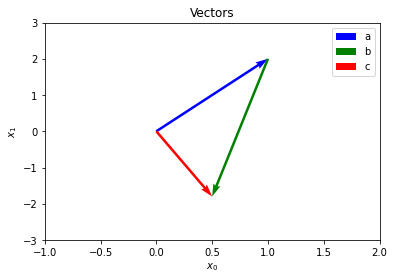

In [2]:
# define vectors
a = np.array([1, 2])
b = np.array([-0.5, -3.8])
c = a + b

# define origin for plot
origin = np.array([0, 0])

# display results
plt.quiver(origin[0], origin[1], a[0], a[1], color='b', angles='xy', scale_units='xy', scale=1, label='a')
plt.quiver(a[0], a[1], b[0], b[1], color='g', angles='xy', scale_units='xy', scale=1, label='b')
plt.quiver(origin[0], origin[1], c[0], c[1], color='r', angles='xy', scale_units='xy', scale=1, label='c')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.title('Vectors')
plt.legend()
plt.axis([-1, 2, -3, 3])
plt.show()

In [3]:
# compute inner product
inner_prod = np.inner(a, b)
dot_prod1 = np.dot(a, b)
dot_prod2 = a @ b

# compute norm
norm_from_ip = np.sqrt(np.inner(a, a))
norm = np.linalg.norm(a, 2)

# display results
print('<a,b> =', inner_prod)
print('a*b =', dot_prod1)
print('a@b =', dot_prod2)
print('sqrt(<a,a>) =', norm_from_ip)
print('||a|| =', norm)

<a,b> = -8.1
a*b = -8.1
a@b = -8.1
sqrt(<a,a>) = 2.23606797749979
||a|| = 2.23606797749979


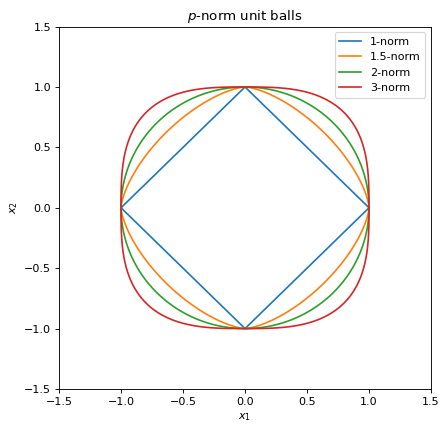

In [20]:
# define domain
n = np.linspace(0, 2 * np.pi, 1000)
x1 = np.cos(n)
x2 = np.sin(n)
x = np.array([x1, x2])

# construct unit balls
p_arr = [1, 1.5, 2, 3]
unit_balls = []
for p in p_arr :
    norm = np.sum(np.abs(x) ** p, axis=0) ** (1/p)
    unit_balls.append(x / norm)

# plot unit balls
plt.figure(figsize=(6, 6), dpi=80)
i = 0
for ball in unit_balls :
    plt.plot(ball[0], ball[1], label='{}-norm'.format(p_arr[i]))
    i += 1
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('$p$-norm unit balls')
plt.legend()
plt.show()